In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# ============================================================
# 1) Đọc ảnh UTKFace và tách age, race
# ============================================================
image_dir = "/kaggle/input/utkface-new/UTKFace"

def processing(file_name: str):
    """Tách age và race từ filename UTKFace"""
    base = os.path.basename(file_name)
    parts = base.split("_")
    if len(parts) < 4:
        return None
    try:
        age = int(parts[0])
        race = int(parts[2])
        return age, race, base
    except:
        return None

file_list = [f for f in os.listdir(image_dir) if f.lower().endswith(".jpg")]
rows = []
for f in file_list:
    result = processing(f)
    if result:
        age, race, filename = result
        rows.append([filename, age, race])

df = pd.DataFrame(rows, columns=["filename", "age", "race"])
print(f"Đọc được {len(df)} ảnh từ {image_dir}")

# ============================================================
# 2) Nhóm tuổi theo định nghĩa (0–6)
# ============================================================
"""
  0 - 10 tuổi (Trẻ em)
  11 - 19 tuổi (Thanh thiếu niên)
  20 - 30 tuổi (Thanh niên)
  31 - 40 tuổi (Trung niên sớm)
  41 - 50 tuổi (Trung niên)
  51 - 69 tuổi (Người lớn tuổi)
  70+ tuổi   (Người già)
"""
bins = [0, 10, 19, 30, 40, 50, 69, 200]
labels = [0, 1, 2, 3, 4, 5, 6]
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True)
df = df.dropna(subset=["age_group"]).copy()
df["age_group"] = df["age_group"].astype(int)

# ============================================================
# 3) Tạo combo để phân tầng và cân bằng hai chiều
# ============================================================
df["combo"] = df["age_group"].astype(str) + "_" + df["race"].astype(str)

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True,stratify = df["combo"])

Đọc được 23705 ảnh từ /kaggle/input/utkface-new/UTKFace


In [2]:
print("Tổng số ảnh:", len(df))
print("Các cột:", df.columns.tolist())
print(df.head())


Tổng số ảnh: 23705
Các cột: ['filename', 'age', 'race', 'age_group', 'combo']
                                filename  age  race  age_group combo
0  26_0_2_20170104023102422.jpg.chip.jpg   26     2          2   2_2
1  22_1_1_20170112233644761.jpg.chip.jpg   22     1          2   2_1
2  21_1_3_20170105003215901.jpg.chip.jpg   21     3          2   2_3
3  28_0_0_20170117180555824.jpg.chip.jpg   28     0          2   2_0
4  17_1_4_20170103222931966.jpg.chip.jpg   17     4          1   1_4


Phân phối nhóm tuổi:
age_group
0    3218
1    1375
2    8068
3    4338
4    2100
5    3234
6    1372
Name: count, dtype: int64


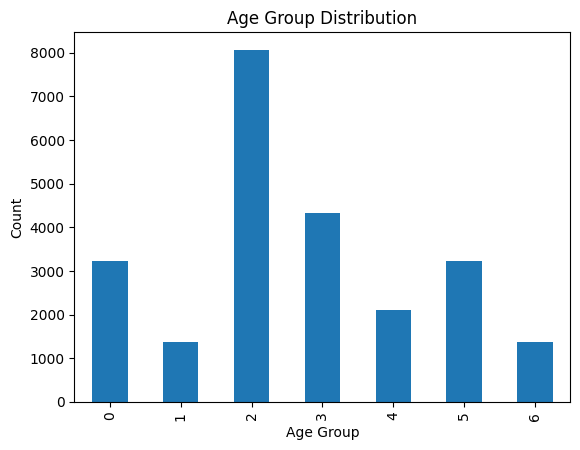

In [3]:
age_dist = df['age_group'].value_counts().sort_index()
print("Phân phối nhóm tuổi:")
print(age_dist)

# Biểu đồ
import matplotlib.pyplot as plt
age_dist.plot(kind='bar', title='Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Phân phối race:
race
0    10078
1     4526
2     3434
3     3975
4     1692
Name: count, dtype: int64


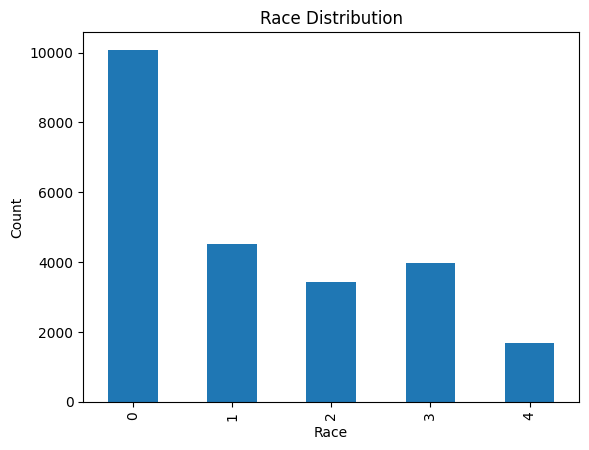

In [4]:
race_dist = df['race'].value_counts().sort_index()
print("Phân phối race:")
print(race_dist)

race_dist.plot(kind='bar', title='Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()


Phân phối combo (age_group_race):
combo
0_0    1212
0_1     170
0_2     936
0_3     501
0_4     399
1_0     837
1_1     166
1_2      89
1_3     137
1_4     146
2_0    2265
2_1    2005
2_2    1481
2_3    1598
2_4     719
3_0    1743
3_1    1212
3_2     439
3_3     688
3_4     256
4_0    1036
4_1     376
4_2     122
4_3     459
4_4     107
5_0    2024
5_1     451
5_2     181
5_3     519
5_4      59
6_0     961
6_1     146
6_2     186
6_3      73
6_4       6
Name: count, dtype: int64


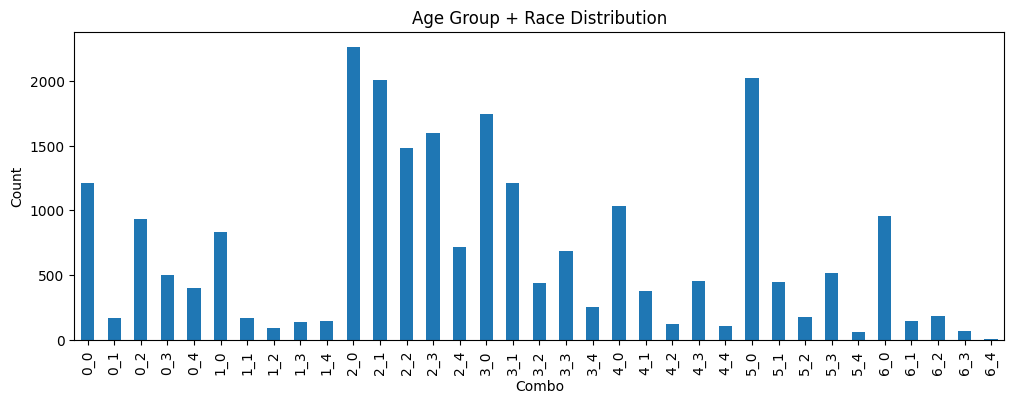

In [5]:
combo_dist = df['combo'].value_counts().sort_index()
print("Phân phối combo (age_group_race):")
print(combo_dist)

combo_dist.plot(kind='bar', figsize=(12,4), title='Age Group + Race Distribution')
plt.xlabel('Combo')
plt.ylabel('Count')
plt.show()


In [6]:
print("Train size:", len(train_df))
print("Validation size:", len(val_df))

# Phân phối nhóm tuổi trong train/val
print("Train age group distribution:")
print(train_df['age_group'].value_counts().sort_index())

print("Validation age group distribution:")
print(val_df['age_group'].value_counts().sort_index())

# Phân phối combo trong train/val
print("Train combo distribution:")
print(train_df['combo'].value_counts().sort_index())

print("Validation combo distribution:")
print(val_df['combo'].value_counts().sort_index())


Train size: 18964
Validation size: 4741
Train age group distribution:
age_group
0    2575
1    1101
2    6454
3    3470
4    1679
5    2587
6    1098
Name: count, dtype: int64
Validation age group distribution:
age_group
0     643
1     274
2    1614
3     868
4     421
5     647
6     274
Name: count, dtype: int64
Train combo distribution:
combo
0_0     970
0_1     136
0_2     749
0_3     401
0_4     319
1_0     670
1_1     133
1_2      71
1_3     110
1_4     117
2_0    1812
2_1    1604
2_2    1185
2_3    1278
2_4     575
3_0    1394
3_1     970
3_2     351
3_3     550
3_4     205
4_0     829
4_1     301
4_2      97
4_3     367
4_4      85
5_0    1619
5_1     361
5_2     145
5_3     415
5_4      47
6_0     769
6_1     117
6_2     149
6_3      58
6_4       5
Name: count, dtype: int64
Validation combo distribution:
combo
0_0    242
0_1     34
0_2    187
0_3    100
0_4     80
1_0    167
1_1     33
1_2     18
1_3     27
1_4     29
2_0    453
2_1    401
2_2    296
2_3    320
2_4    144
3_0

In [7]:
print(df.groupby('race')['age'].mean())


race
0    37.980949
1    33.860362
2    25.867501
3    31.532830
4    23.169031
Name: age, dtype: float64


race          0     1     2     3    4
age_group                             
0          1212   170   936   501  399
1           837   166    89   137  146
2          2265  2005  1481  1598  719
3          1743  1212   439   688  256
4          1036   376   122   459  107
5          2024   451   181   519   59
6           961   146   186    73    6


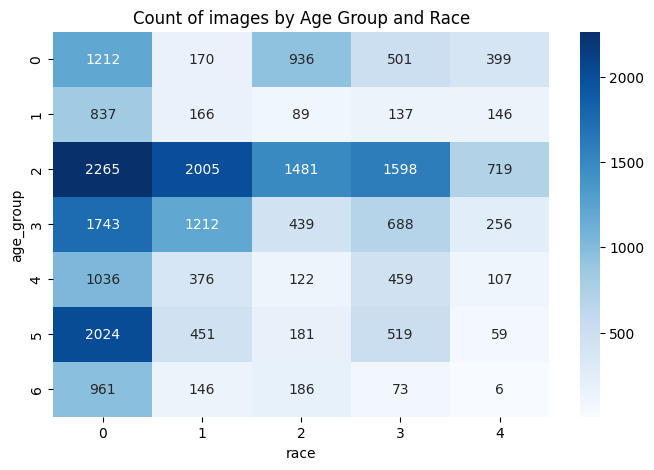

In [8]:
pivot = df.pivot_table(index='age_group', columns='race', values='filename', aggfunc='count', fill_value=0)
print(pivot)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Count of images by Age Group and Race")
plt.show()


Train age distribution:
 age_group
0    0.135784
1    0.058057
2    0.340329
3    0.182978
4    0.088536
5    0.136416
6    0.057899
Name: proportion, dtype: float64
Validation age distribution:
 age_group
0    0.135625
1    0.057794
2    0.340435
3    0.183084
4    0.088800
5    0.136469
6    0.057794
Name: proportion, dtype: float64


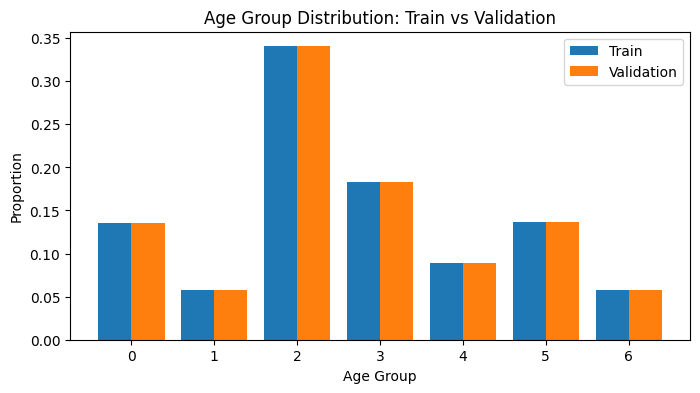

In [9]:
train_age_dist = train_df['age_group'].value_counts(normalize=True).sort_index()
val_age_dist = val_df['age_group'].value_counts(normalize=True).sort_index()

print("Train age distribution:\n", train_age_dist)
print("Validation age distribution:\n", val_age_dist)

# So sánh trực quan
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(train_age_dist.index-0.2, train_age_dist.values, width=0.4, label='Train')
plt.bar(val_age_dist.index+0.2, val_age_dist.values, width=0.4, label='Validation')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.title('Age Group Distribution: Train vs Validation')
plt.legend()
plt.show()


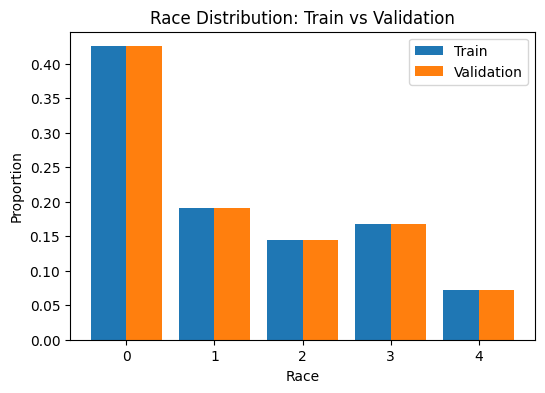

In [10]:
train_race_dist = train_df['race'].value_counts(normalize=True).sort_index()
val_race_dist = val_df['race'].value_counts(normalize=True).sort_index()

plt.figure(figsize=(6,4))
plt.bar(train_race_dist.index-0.2, train_race_dist.values, width=0.4, label='Train')
plt.bar(val_race_dist.index+0.2, val_race_dist.values, width=0.4, label='Validation')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.title('Race Distribution: Train vs Validation')
plt.legend()
plt.show()


          train       val
combo                    
0_0    0.051150  0.051044
0_1    0.007171  0.007171
0_2    0.039496  0.039443
0_3    0.021145  0.021093
0_4    0.016821  0.016874
1_0    0.035330  0.035225
1_1    0.007013  0.006961
1_2    0.003744  0.003797
1_3    0.005800  0.005695
1_4    0.006170  0.006117
2_0    0.095549  0.095549
2_1    0.084581  0.084581
2_2    0.062487  0.062434
2_3    0.067391  0.067496
2_4    0.030321  0.030373
3_0    0.073508  0.073613
3_1    0.051150  0.051044
3_2    0.018509  0.018561
3_3    0.029002  0.029108
3_4    0.010810  0.010757
4_0    0.043714  0.043662
4_1    0.015872  0.015819
4_2    0.005115  0.005273
4_3    0.019352  0.019405
4_4    0.004482  0.004640
5_0    0.085372  0.085425
5_1    0.019036  0.018983
5_2    0.007646  0.007593
5_3    0.021884  0.021936
5_4    0.002478  0.002531
6_0    0.040551  0.040498
6_1    0.006170  0.006117
6_2    0.007857  0.007804
6_3    0.003058  0.003164
6_4    0.000264  0.000211


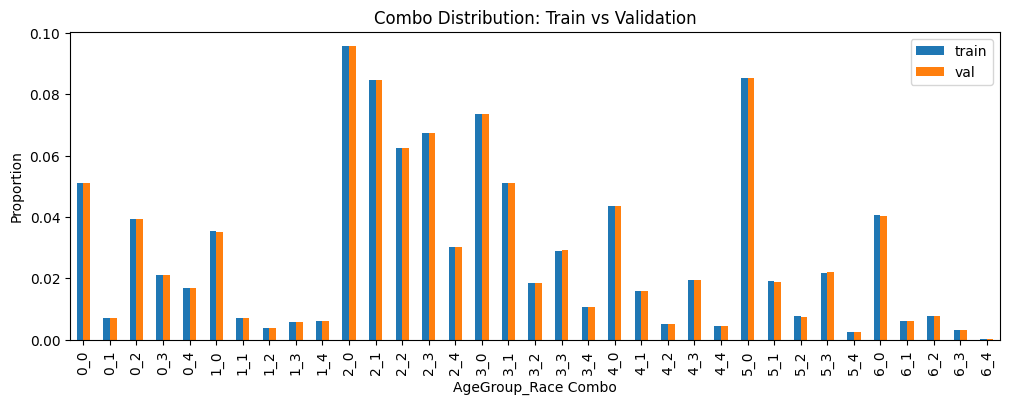

In [11]:
train_combo_dist = train_df['combo'].value_counts(normalize=True).sort_index()
val_combo_dist = val_df['combo'].value_counts(normalize=True).sort_index()

# So sánh từng combo
combo_compare = pd.DataFrame({
    "train": train_combo_dist,
    "val": val_combo_dist
}).fillna(0)

print(combo_compare)

# Biểu đồ trực quan
combo_compare.plot(kind='bar', figsize=(12,4), title='Combo Distribution: Train vs Validation')
plt.xlabel('AgeGroup_Race Combo')
plt.ylabel('Proportion')
plt.show()


In [12]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class UTKFaceDataset(Dataset):
    def __init__(self, df, img_dir, transform=None):
        """
        Args:
            csv_file (str): đường dẫn tới file CSV (vd: 'train_balanced_final.csv')
            img_dir  (str): thư mục chứa ảnh UTKFace
            transform (callable, optional): phép biến đổi ảnh (augmentation, normalization,...)
        """
        self.img_dir = img_dir
        self.df = df
        
        # Nếu không truyền transform → dùng mặc định
        if transform is None:
            self.transform = transforms.Compose([
                transforms.Resize((224, 224)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
            ])
        else:
            self.transform = transform

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        """
        Trả về:
            image: tensor ảnh đã transform
            age_group: int (0–6)
            race: int (0–4)
        """
        row = self.df.iloc[idx]
        filename = row['filename']
        age_group = int(row['age_group'])
        race = int(row['race'])

        img_path = os.path.join(self.img_dir, filename)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, age_group, race


In [13]:
import torch.nn.functional as F
import torch

# compute combined cross-entropy loss for age and race
def cross_entropy_loss(logits_age, targets_age,logits_race, targets_race):
    loss_age = F.cross_entropy(logits_age, targets_age) 
    loss_race = F.cross_entropy(logits_race, targets_race)
    return 0.6*loss_age + 0.4*loss_race

# compute combined focal loss for age and race
def focal_loss(logits_age, targets_age, logits_race, targets_race, alpha=1, gamma=2, weight_age=None, weight_race=None):
    """
    Focal loss cho bài toán đa nhãn, hỗ trợ class weights cho mất cân bằng:
    - weight_age: tensor (num_age_classes,) hoặc None
    - weight_race: tensor (num_race_classes,) hoặc None
    """
    # Focal loss for age
    ce_age = F.cross_entropy(logits_age, targets_age, reduction='none', weight=weight_age)
    pt_age = torch.exp(-ce_age)
    focal_age = alpha * (1 - pt_age) ** gamma * ce_age
    loss_age = focal_age.mean()

    # Focal loss for race
    ce_race = F.cross_entropy(logits_race, targets_race, reduction='none', weight=weight_race)
    pt_race = torch.exp(-ce_race)
    focal_race = alpha * (1 - pt_race) ** gamma * ce_race
    loss_race = focal_race.mean()

    return 0.7*loss_age + 0.3*loss_race

In [14]:
import torch
import torch.nn as nn
from torchvision import models

# =========================
# CBAM Attention
# =========================
class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.mlp = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction, in_channels, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        b, c, _, _ = x.size()
        avg_out = self.mlp(self.avg_pool(x).view(b, c))
        max_out = self.mlp(self.max_pool(x).view(b, c))
        out = avg_out + max_out
        out = self.sigmoid(out).view(b, c, 1, 1)
        return x * out


class SpatialAttention(nn.Module):
    def __init__(self, kernel_size=7):
        super().__init__()
        padding = 3 if kernel_size == 7 else 1
        self.conv = nn.Conv2d(2, 1, kernel_size, padding=padding, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x_cat = torch.cat([avg_out, max_out], dim=1)
        x_out = self.conv(x_cat)
        x_out = self.sigmoid(x_out)
        return x * x_out


class CBAM(nn.Module):
    def __init__(self, channels, reduction=16, kernel_size=7):
        super().__init__()
        self.channel_att = ChannelAttention(channels, reduction)
        self.spatial_att = SpatialAttention(kernel_size)

    def forward(self, x):
        x = self.channel_att(x)
        x = self.spatial_att(x)
        return x


# =========================
# MultiHeadClassifier with CBAM
# =========================
class MultiHeadClassifier(nn.Module):
    def __init__(self, num_age_classes, num_race_classes, backbone_name="mobilenet_v3_large", pretrained=True, dropout=0.3):
        super().__init__()

        # --------------------
        # Backbone
        # --------------------
        if backbone_name == "mobilenet_v2":
            backbone = models.mobilenet_v2(weights="IMAGENET1K_V1")
            self.backbone = backbone.features
            self.feature_dim = backbone.last_channel

        elif backbone_name == "mobilenet_v3_small":
            backbone = models.mobilenet_v3_small(weights="IMAGENET1K_V1")
            self.backbone = backbone.features
            self.feature_dim = backbone.features[-1][0].out_channels

        elif backbone_name == "mobilenet_v3_large":
            backbone = models.mobilenet_v3_large(weights="IMAGENET1K_V1")
            self.backbone = backbone.features
            self.feature_dim = backbone.features[-1][0].out_channels

        elif backbone_name == "resnet50":
            backbone = models.resnet18(weights="IMAGENET1K_V1")
            self.backbone = nn.Sequential(*list(backbone.children())[:-2])
            self.feature_dim = backbone.fc.in_features

        else:
            raise ValueError(f"Unsupported backbone: {backbone_name}")

        # --------------------
        # CBAM Attention
        # --------------------
        self.att = CBAM(self.feature_dim)

        # --------------------
        # Neck: AvgPool + Dropout
        # --------------------
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(dropout)

        # --------------------
        # Multi-task heads: Age + Race (MLP 1 tầng)
        # --------------------
        self.fc_age = nn.Sequential(
            nn.Linear(self.feature_dim, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, num_age_classes)
        )

        self.fc_race = nn.Sequential(
            nn.Linear(self.feature_dim, 512),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(512, num_race_classes)
        )

    def forward(self, x):
        x = self.backbone(x)      # Feature map [B, C, H, W]
        x = self.att(x)           # CBAM attention
        x = self.avgpool(x)
        x = self.flatten(x)
        x = self.dropout(x)
        age_logits = self.fc_age(x)
        race_logits = self.fc_race(x)
        return age_logits, race_logits


In [ ]:
import os
import csv
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torchvision import transforms, models

# ==== Thiết bị ====
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Device:", device)

# ==== Dữ liệu ====
image_dir = "/kaggle/input/utkface-new/UTKFace"
train_df
# weight_age_tensor = weight_age_tensor.to(device)
# weight_race_tensor = weight_race_tensor.to(device)

train_tf = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(0.2, 0.2, 0.2, 0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

val_tf = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# ==== Dataset & Loader ====
train_ds = UTKFaceDataset(df = train_df, img_dir=image_dir, transform=train_tf)
val_ds   = UTKFaceDataset(df = val_df,   img_dir=image_dir, transform=val_tf)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True,  num_workers=0, pin_memory=True)
val_loader   = DataLoader(val_ds,   batch_size=128, shuffle=False, num_workers=0, pin_memory=True)

print(f"Train samples: {len(train_ds)} | Val samples: {len(val_ds)}")

# ==== Mô hình Multi-Head (MobileNetV2) ====


model = MultiHeadClassifier(num_age_classes=7, num_race_classes=5, backbone_name = "mobilenet_v2").to(device) 


# ==== Optimizer ====
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# ==== Checkpoint / Log ====
start_epoch = 0
best_val_loss = float('inf')
ckpt_last = "model_last.pth"
ckpt_best = "model_best.pth"
log_csv = "classification/train_log.csv"
os.makedirs(os.path.dirname(log_csv), exist_ok=True)

if os.path.exists(ckpt_last):
    checkpoint = torch.load(ckpt_last, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    start_epoch = checkpoint.get('epoch', 0) + 1
    best_val_loss = checkpoint.get('best_val_loss', float('inf'))
    print(f"Resumed from {ckpt_last}, next epoch = {start_epoch}")

# ==== Train Loop ====
epochs = 1
for epoch in range(start_epoch, epochs):
    # ---- TRAIN ----
    model.train()
    total_loss = 0.0
    step = 0
    pbar = tqdm(train_loader, desc=f"[Train] Epoch {epoch+1}/{epochs}")
    for images, age_targets, race_targets in pbar:
        images = images.to(device, non_blocking=True)
        age_targets = age_targets.to(device, non_blocking=True).long()
        race_targets = race_targets.to(device, non_blocking=True).long()

        logits_age, logits_race = model(images)
        # loss = focal_loss(logits_age, age_targets, logits_race, race_targets, alpha=1, gamma=2,weight_age=weight_age_tensor, weight_race=weight_race_tensor)
        # loss = focal_loss(logits_age, age_targets, logits_race, race_targets, alpha=1, gamma=2)
        loss = cross_entropy_loss(logits_age, age_targets, logits_race, race_targets)

        optimizer.zero_grad(set_to_none=True)
        loss.backward()
        optimizer.step()

        step += 1
        total_loss += loss.item()
        avg_loss = total_loss / step
        pbar.set_postfix({"train_loss": f"{avg_loss:.4f}"})
    train_loss = total_loss / max(1, step)

    # ---- VALIDATION ----
    model.eval()
    val_loss = 0.0
    val_steps = 0
    correct_age = 0
    correct_race = 0
    total = 0

    vbar = tqdm(val_loader, desc=f"[Val]   Epoch {epoch+1}/{epochs}")
    with torch.no_grad():
        for images, age_targets, race_targets in vbar:
            images = images.to(device, non_blocking=True)
            age_targets = age_targets.to(device, non_blocking=True).long()
            race_targets = race_targets.to(device, non_blocking=True).long()

            logits_age, logits_race = model(images)
            loss = focal_loss(logits_age, age_targets, logits_race, race_targets, alpha=1, gamma=2)
            val_loss += loss.item()
            val_steps += 1

            pred_age = torch.argmax(logits_age, dim=1)
            pred_race = torch.argmax(logits_race, dim=1)
            correct_age  += (pred_age == age_targets).sum().item()
            correct_race += (pred_race == race_targets).sum().item()
            total += images.size(0)

            avg_val_loss = val_loss / val_steps
            age_acc = correct_age / total if total > 0 else 0.0
            race_acc = correct_race / total if total > 0 else 0.0
            vbar.set_postfix({
                "val_loss": f"{avg_val_loss:.4f}",
                "age_acc": f"{age_acc:.3f}",
                "race_acc": f"{race_acc:.3f}"
            })

    val_loss = val_loss / max(1, val_steps)
    age_acc = correct_age / total if total > 0 else 0.0
    race_acc = correct_race / total if total > 0 else 0.0

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"| Train Loss: {train_loss:.4f} "
          f"| Val Loss: {val_loss:.4f} "
          f"| Age Acc: {age_acc:.4f} "
          f"| Race Acc: {race_acc:.4f}")

    # ---- Checkpoint ----
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'best_val_loss': best_val_loss
    }, ckpt_last)

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'best_val_loss': best_val_loss
        }, ckpt_best)
        print(f">>> Saved new best model at epoch {epoch+1}")

    # ---- CSV Log ----
    file_exists = os.path.isfile(log_csv) and os.path.getsize(log_csv) > 0
    with open(log_csv, 'a', newline='') as csvfile:
        writer = csv.writer(csvfile)
        if not file_exists:
            writer.writerow(["epoch", "train_loss", "val_loss", "age_acc", "race_acc"])
        writer.writerow([epoch+1, f"{train_loss:.4f}", f"{val_loss:.4f}",
                         f"{age_acc:.4f}", f"{race_acc:.4f}"])


# load model

In [22]:
def load_age_race_classifier():
    """
    Docstring for load_age_race_classifier
    - Returns a function that performs age and race classification on input face images.
    - The returned function takes a BGR numpy array of a face image as input and returns:
      age_pred:int, age_conf:float, race_pred:int, race_conf:float.
    - if multiple face in frame, returns:
        list of age_pred, list of age_conf, list of race_pred, list of race_conf
    - eg:
        age_preds, age_confs, race_preds, race_confs = classify_fn(face_img)
    """
    model = MultiHeadClassifier(
        num_age_classes=7,
        num_race_classes=5,
        backbone_name="mobilenet_v2"
    )
    checkpoint = torch.load(
        "/kaggle/input/checkpoint-utkface/model_last.pth",
        map_location=device
    )
    model.load_state_dict(checkpoint["model_state_dict"])
    model.to(device)
    model.eval()
    return model


In [23]:
model = load_age_race_classifier()

In [41]:
from sklearn.metrics import confusion_matrix
import torch
from tqdm import tqdm

# reset trước mỗi epoch
val_loss = 0.0
val_steps = 0
correct_age = 0
correct_race = 0
total = 0

Y_true_age, Y_pred_age = [], []
Y_true_race, Y_pred_race = [], []

vbar = tqdm(val_loader, desc=f"[Val]   Epoch {epoch+1}/{epochs}")

with torch.no_grad():
    for images, age_targets, race_targets in vbar:
        images = images.to(device, non_blocking=True)
        age_targets = age_targets.to(device, non_blocking=True).long()
        race_targets = race_targets.to(device, non_blocking=True).long()

        logits_age, logits_race = model(images)

        # dự đoán
        pred_age = torch.argmax(logits_age, dim=1)
        pred_race = torch.argmax(logits_race, dim=1)

        # accuracy
        correct_age += (pred_age == age_targets).sum().item()
        correct_race += (pred_race == race_targets).sum().item()
        total += images.size(0)

        # lưu để tính confusion matrix
        Y_true_age.extend(age_targets.cpu().numpy())
        Y_pred_age.extend(pred_age.cpu().numpy())
        Y_true_race.extend(race_targets.cpu().numpy())
        Y_pred_race.extend(pred_race.cpu().numpy())

        val_steps += 1

        age_acc = correct_age / total if total > 0 else 0.0
        race_acc = correct_race / total if total > 0 else 0.0

        vbar.set_postfix({
            "age_acc": f"{age_acc:.3f}",
            "race_acc": f"{race_acc:.3f}"
        })

# ====== Sau khi kết thúc validation epoch ======
age_acc = correct_age / total if total > 0 else 0.0
race_acc = correct_race / total if total > 0 else 0.0

# confusion matrices
cm_age = confusion_matrix(Y_true_age, Y_pred_age)
cm_race = confusion_matrix(Y_true_race, Y_pred_race)

print(f"Epoch [{epoch+1}/{epochs}] "
      f"| Age Acc: {age_acc:.4f} "
      f"| Race Acc: {race_acc:.4f}"
      f"| Mean Acc: {(age_acc + race_acc)/2:.4f}")



[Val]   Epoch 1/1: 100%|██████████| 38/38 [00:16<00:00,  2.33it/s, age_acc=0.649, race_acc=0.831]

Epoch [1/1] | Age Acc: 0.6490 | Race Acc: 0.8308| Mean Acc: 0.7399


In [30]:
age_labels = [
    "0–10 (Trẻ em)",
    "11–19 (Thanh thiếu niên)",
    "20–30 (Thanh niên)",
    "31–40 (Trung niên sớm)",
    "41–50 (Trung niên)",
    "51–69 (Người lớn tuổi)",
    "70+ (Người già)"
]

race_labels = [
    "White",
    "Black",
    "Asian",
    "Indian",
    "Others"
]


In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(
    cm,
    class_names,
    title,
    normalize=False
):
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
        cm = np.nan_to_num(cm)

    plt.figure(figsize=(7, 6))
    plt.imshow(cm)
    plt.title(title)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.colorbar()

    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names, rotation=45, ha="right")
    plt.yticks(ticks, class_names)

    thresh = cm.max() * 0.6
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = cm[i, j]
            text = f"{value:.2f}" if normalize else int(value)
            plt.text(
                j, i, text,
                ha="center", va="center",
                color="white" if value > thresh else "black",
                fontsize=9
            )

    plt.tight_layout()
    plt.show()


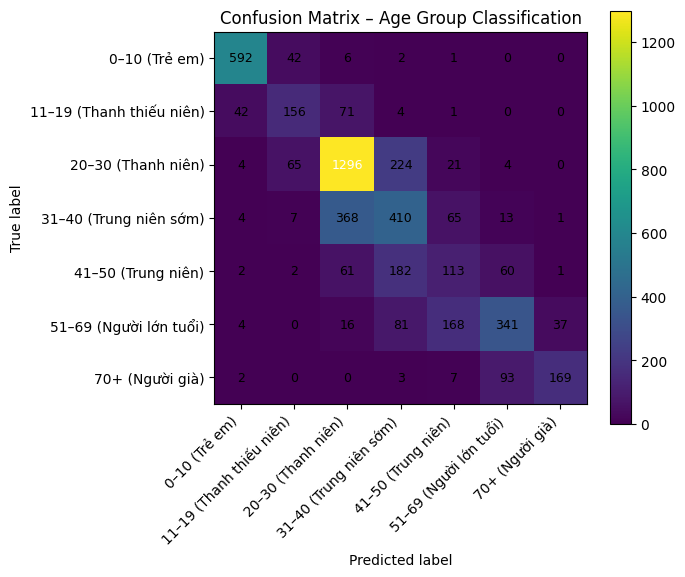

In [32]:
plot_confusion_matrix(
    cm_age,
    class_names=age_labels,
    title="Confusion Matrix – Age Group Classification",
    normalize=False   # đổi True nếu muốn %
)


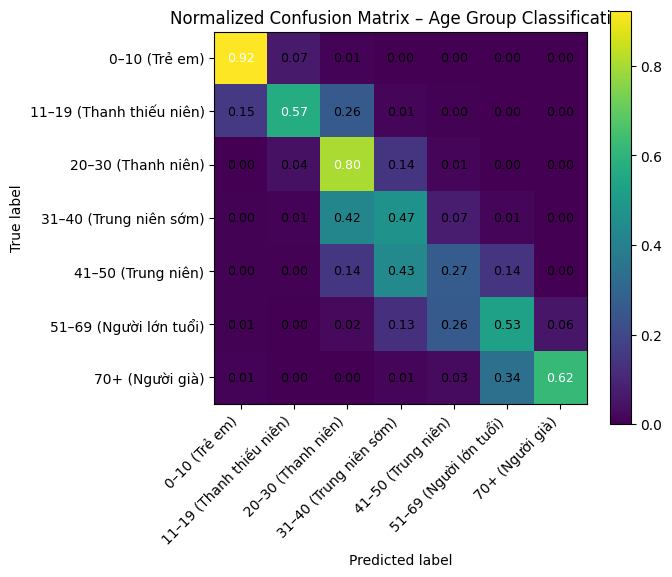

In [33]:
plot_confusion_matrix(
    cm_age,
    class_names=age_labels,
    title="Normalized Confusion Matrix – Age Group Classification",
    normalize=True
)


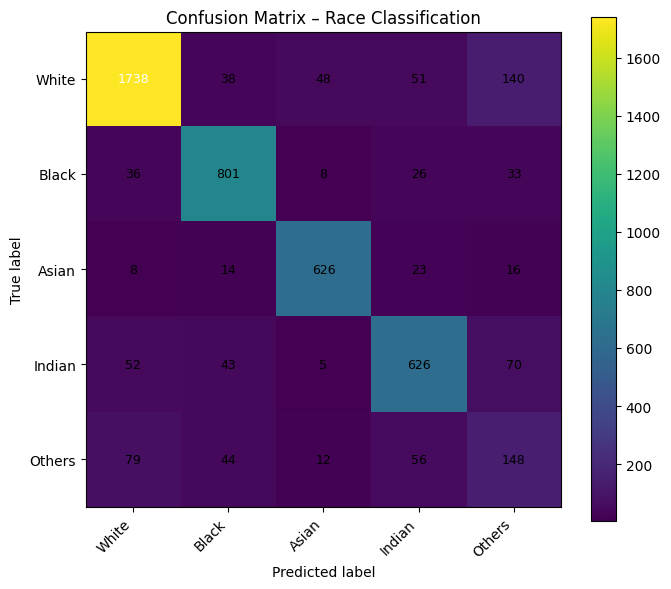

In [34]:
plot_confusion_matrix(
    cm_race,
    class_names=race_labels,
    title="Confusion Matrix – Race Classification",
    normalize=False
)


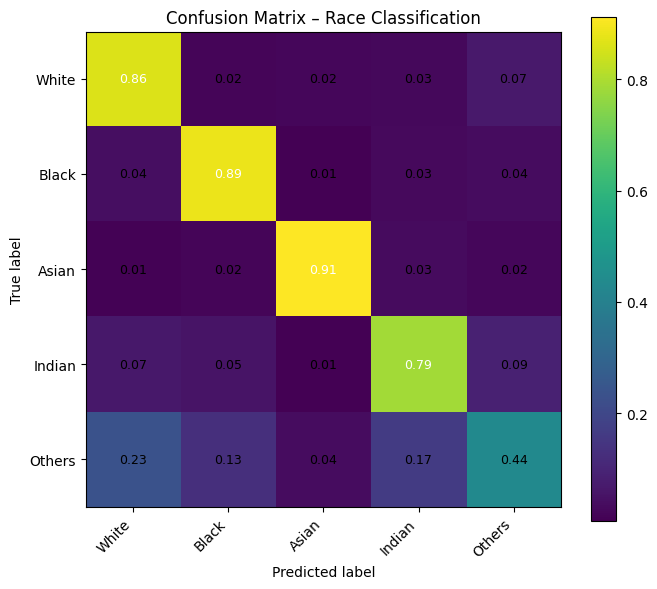

In [36]:
plot_confusion_matrix(
    cm_race,
    class_names=race_labels,
    title="Confusion Matrix – Race Classification",
    normalize= True
)